In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie  = ['movie_id','movie_name','genre']
rating = ['user_id','movie_id','rating','time_stamp']
user = ['user_id','gender','age','occupation','zip_code']

In [193]:
df_movies = pd.read_csv('C:/Users/Lenovo/Downloads/Compressed/movies.dat',header=None,delimiter ='::',names=movie,encoding='windows-1251')
df_ratings = pd.read_csv('C:/Users/Lenovo/Downloads/Compressed/ratings.dat',header=None,delimiter ='::',names=rating,encoding='windows-1251')
df_users = pd.read_csv('C:/Users/Lenovo/Downloads/Compressed/users.dat',header=None,delimiter ='::',names=user,encoding='windows-1251')

In [194]:
df_movies.head(3)

,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [152]:
df_ratings.head(3)

,user_id,movie_id,rating,time_stamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [153]:
df_users.head(3)

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


In [154]:
df_movies.head(3)

,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [195]:
# merging 3 dataframes
df1 = df_movies.merge(df_ratings,how='outer',on='movie_id')
df = df1.merge(df_users,how='outer',on='user_id')

In [156]:
df

,movie_id,movie_name,genre,user_id,rating,time_stamp,gender,age,occupation,zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067
...,...,...,...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),Drama|Thriller,5727.0,4.0,958489970.0,M,25.0,4.0,92843
1000382,3535,American Psycho (2000),Comedy|Horror|Thriller,5727.0,2.0,958489970.0,M,25.0,4.0,92843
1000383,3536,Keeping the Faith (2000),Comedy|Romance,5727.0,5.0,958489902.0,M,25.0,4.0,92843
1000384,3555,U-571 (2000),Action|Thriller,5727.0,3.0,958490699.0,M,25.0,4.0,92843


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   movie_id    1000386 non-null  int64  
 1   movie_name  1000386 non-null  object 
 2   genre       1000386 non-null  object 
 3   user_id     1000209 non-null  float64
 4   rating      1000209 non-null  float64
 5   time_stamp  1000209 non-null  float64
 6   gender      1000209 non-null  object 
 7   age         1000209 non-null  float64
 8   occupation  1000209 non-null  float64
 9   zip_code    1000209 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


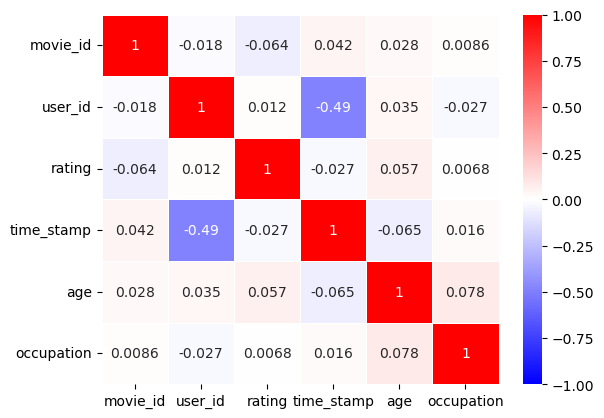

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(df.corr(),annot=True,cmap='bwr',vmin=-1,vmax=+1,linewidth=0.5)
plt.show()

 # top 25 movies by viewership

In [159]:
df.groupby('movie_name')[['user_id']].nunique().sort_values(by='user_id',ascending=False)[:25]

,user_id
movie_name,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672
Saving Private Ryan (1998),2653
Terminator 2: Judgment Day (1991),2649
"Matrix, The (1999)",2590
Back to the Future (1985),2583


# user age distribution

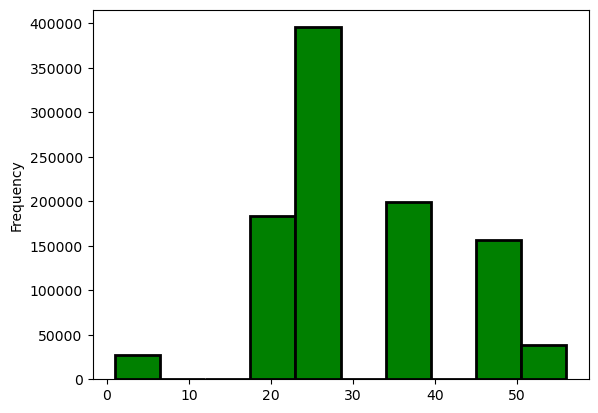

In [160]:
df['age'].plot(kind='hist',color='g',edgecolor='k',linewidth=2)
plt.show()

# user ratings for movie named : Toy Story

4.0    835
5.0    820
3.0    345
2.0     61
1.0     16
Name: rating, dtype: int64


<AxesSubplot:xlabel='rating', ylabel='count'>

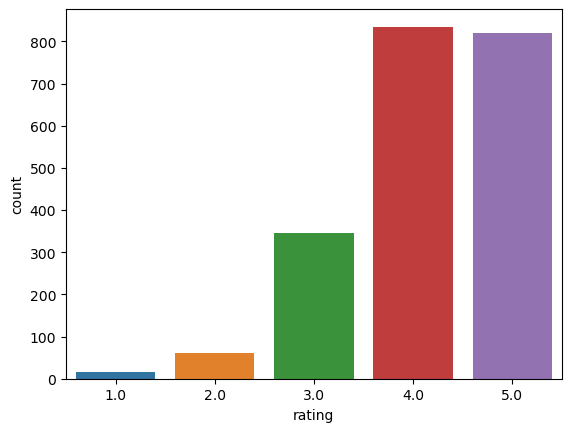

In [161]:
zx = df[df['movie_name']=='Toy Story (1995)']['rating'].value_counts()
print(zx)
sns.countplot(df[df['movie_name']=='Toy Story (1995)']['rating'])

#  ratings for all movies by user id 2696

In [162]:
df[df['user_id']==2696][['movie_name','rating']].sort_values(by='rating',ascending=False).T

,991213,991222,991224,991214,991230,991216,991228,991226,991219,991220,991225,991223,991212,991218,991215,991221,991227,991217,991229,991231
movie_name,Lone Star (1996),"Devil's Advocate, The (1997)",Palmetto (1998),Basic Instinct (1992),"Talented Mr. Ripley, The (1999)","Shining, The (1980)",Psycho (1998),"Perfect Murder, A (1998)",L.A. Confidential (1997),"Game, The (1997)",Wild Things (1998),Midnight in the Garden of Good and Evil (1997),"Client, The (1994)",Cop Land (1997),E.T. the Extra-Terrestrial (1982),I Know What You Did Last Summer (1997),I Still Know What You Did Last Summer (1998),Back to the Future (1985),Lake Placid (1999),JFK (1991)
rating,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0


# creating a profile report

In [ ]:
import pandas_profiling as pf
profile = pf.ProfileReport(df)
profile.to_file('movie lens profile.html')

In [196]:
df.dropna(inplace=True)
df.isna().sum()

movie_id      0
movie_name    0
genre         0
user_id       0
rating        0
time_stamp    0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64

#  unique genres 

In [165]:
gg = df['genre'].tolist()

uniq_genre = set()
for i in gg:
    dd = i.split('|')
    for j in dd:
        uniq_genre.add(j)

print(list(uniq_genre))

# df.genre.str.get_dummies().columns

['Sci-Fi', 'Horror', 'Mystery', 'Film-Noir', 'Documentary', 'Crime', 'Animation', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Thriller', 'Western', 'War', "Children's", 'Musical', 'Romance', 'Drama']


In [197]:
df = pd.concat([df,df.genre.str.get_dummies()],axis=1)

In [167]:
df.head()

,movie_id,movie_name,genre,user_id,rating,time_stamp,gender,age,occupation,zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,1,0


In [198]:
df.drop(['movie_name','zip_code','time_stamp','genre'],axis=1,inplace=True)
df.head()

,movie_id,user_id,rating,gender,age,occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1.0,5.0,F,1.0,10.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,48,1.0,5.0,F,1.0,10.0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
2,150,1.0,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,1.0,4.0,F,1.0,10.0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,527,1.0,5.0,F,1.0,10.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [199]:
# df = pd.get_dummies(columns=['gender'],data=df,drop_first=True)
df.gender = pd.get_dummies(df.gender,drop_first=True)

In [200]:
df = pd.get_dummies(columns=['occupation'],drop_first=True,data=df)

In [201]:
df

,movie_id,user_id,rating,gender,age,Action,Adventure,Animation,Children's,Comedy,...,occupation_11.0,occupation_12.0,occupation_13.0,occupation_14.0,occupation_15.0,occupation_16.0,occupation_17.0,occupation_18.0,occupation_19.0,occupation_20.0
0,1,1.0,5.0,0,1.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,48,1.0,5.0,0,1.0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,150,1.0,5.0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,1.0,4.0,0,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,527,1.0,5.0,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3513,5727.0,4.0,1,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000382,3535,5727.0,2.0,1,25.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000383,3536,5727.0,5.0,1,25.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000384,3555,5727.0,3.0,1,25.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
x = df.drop(columns=['movie_id','user_id','rating'])
y=df[['rating']]

In [203]:
x

,gender,age,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,occupation_11.0,occupation_12.0,occupation_13.0,occupation_14.0,occupation_15.0,occupation_16.0,occupation_17.0,occupation_18.0,occupation_19.0,occupation_20.0
0,0,1.0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,1,25.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1000382,1,25.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000383,1,25.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000384,1,25.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2,random_state = 10,stratify=y)

# The dataset size being very huge we use LGBM Classifier

In [211]:
from lightgbm import LGBMClassifier as lgbm_ , LGBMRanker as lgbmrank
from sklearn.metrics import accuracy_score

In [208]:
lgbm = lgbm_(n_jobs=-1,boosting_type='gbdt',objective='multiclass')
lgbm.fit(x_train,y_train)

LGBMClassifier(objective='multiclass')

In [209]:
print(lgbm.score(x_test,y_test))

0.3623139140780436
